In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv('ABBREV.csv')


In [3]:
df

,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,0,1001.0,"BUTTER,WITH SALT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1,1002.0,"BUTTER,WHIPPED,W/ SALT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,2,1003.0,"BUTTER OIL,ANHYDROUS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1004.0,"CHEESE,BLUE",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4,0.068,9.100,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,4,1005.0,"CHEESE,BRICK",41.11,371.0,23.24,29.68,3.18,2.79,0.0,...,2.5,4.610,0.867,1.746,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,8785,83110.0,"MACKEREL,SALTED",43.00,305.0,18.50,25.10,13.40,0.00,0.0,...,7.8,7.148,8.320,6.210,95.0,80.00,"1 piece, (5-1/2"" x 1-1/2"" x 1/2"")",17.0,"1 cubic inch, boneless",0.0
8786,8786,90240.0,"SCALLOP,(BAY&SEA),CKD,STMD",70.25,111.0,20.54,0.84,2.97,5.41,0.0,...,0.0,0.218,0.082,0.222,41.0,85.00,3 oz,NaN,NaN,0.0
8787,8787,90480.0,"SYRUP,CANE",26.00,269.0,0.00,0.00,0.86,73.14,0.0,...,0.0,0.000,0.000,0.000,0.0,21.00,1 serving,NaN,NaN,0.0
8788,8788,90560.0,"SNAIL,RAW",79.20,90.0,16.10,1.40,1.30,2.00,0.0,...,0.1,0.361,0.259,0.252,50.0,85.00,3 oz,NaN,NaN,0.0


In [4]:
df.fillna(0, inplace=True)
X = df.drop(['index', 'NDB_No', 'Shrt_Desc', 'GmWt_Desc1', 'GmWt_Desc2'], axis=1).values

we will preprocess the dataset and extract the clusters using an Autoencoder

In [5]:
df

,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,0,1001.0,"BUTTER,WITH SALT",0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.000,0.000,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1,1002.0,"BUTTER,WHIPPED,W/ SALT",0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,2,1003.0,"BUTTER OIL,ANHYDROUS",0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.000,0.000,0.0,0.00,0,0.0,0,0.0
3,3,1004.0,"CHEESE,BLUE",0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,2.4,0.068,9.100,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,4,1005.0,"CHEESE,BRICK",41.11,371.0,23.24,29.68,3.18,2.79,0.0,...,2.5,4.610,0.867,1.746,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,8785,83110.0,"MACKEREL,SALTED",43.00,305.0,18.50,25.10,13.40,0.00,0.0,...,7.8,7.148,8.320,6.210,95.0,80.00,"1 piece, (5-1/2"" x 1-1/2"" x 1/2"")",17.0,"1 cubic inch, boneless",0.0
8786,8786,90240.0,"SCALLOP,(BAY&SEA),CKD,STMD",70.25,111.0,20.54,0.84,2.97,5.41,0.0,...,0.0,0.218,0.082,0.222,41.0,85.00,3 oz,0.0,0,0.0
8787,8787,90480.0,"SYRUP,CANE",26.00,269.0,0.00,0.00,0.86,73.14,0.0,...,0.0,0.000,0.000,0.000,0.0,21.00,1 serving,0.0,0,0.0
8788,8788,90560.0,"SNAIL,RAW",79.20,90.0,16.10,1.40,1.30,2.00,0.0,...,0.1,0.361,0.259,0.252,50.0,85.00,3 oz,0.0,0,0.0


In [6]:
# Feature Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Autoencoder
from keras.layers import Input, Dense
from keras.models import Model

# Set the encoding dimension
encoding_dim = 3

# Input layer
input_layer = Input(shape=(X.shape[1],))

# Encoder layers
encoder = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder layers
decoder = Dense(X.shape[1], activation='softmax')(encoder)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, shuffle=True, validation_split=0.2)

Epoch 1/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1979 - loss: 0.0141 - val_accuracy: 0.6342 - val_loss: 0.0071
Epoch 2/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7151 - loss: 0.0073 - val_accuracy: 0.6638 - val_loss: 0.0051
Epoch 3/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7586 - loss: 0.0054 - val_accuracy: 0.6678 - val_loss: 0.0040
Epoch 4/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7840 - loss: 0.0047 - val_accuracy: 0.8925 - val_loss: 0.0034
Epoch 5/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9206 - loss: 0.0040 - val_accuracy: 0.9346 - val_loss: 0.0030
Epoch 6/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9227 - loss: 0.0038 - val_accuracy: 0.9249 - val_loss: 0.0028
Epoch 7/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9230 - loss: 0.0036 - val_accuracy: 0.9198 - val_loss: 0.0028
Epoch 8/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9264 - loss: 0.0036 - val_accuracy: 0.

After training the autoencoder, we can extract the encoded features:

In [7]:
# Extract encoded features
encoder = Model(inputs=input_layer, outputs=encoder)
encoded_features = encoder.predict(X_scaled)

275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Now, we can apply K-means clustering to group the samples into three clusters:

In [8]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(encoded_features)
clusters = kmeans.predict(encoded_features)

high_caloric = encoded_features[clusters == 0]
mid_caloric = encoded_features[clusters == 1]
low_caloric = encoded_features[clusters == 2]
df['cluster'] = clusters

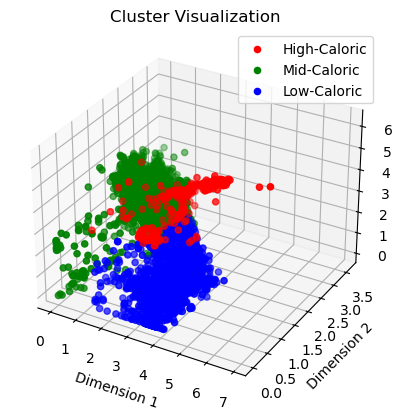

In [9]:
# Visualize the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the high-caloric food cluster
ax.scatter(high_caloric[:, 0], high_caloric[:, 1], high_caloric[:, 2], c='r', label='High-Caloric')

# Plot the mid-caloric food cluster
ax.scatter(mid_caloric[:, 0], mid_caloric[:, 1], mid_caloric[:, 2], c='g', label='Mid-Caloric')

# Plot the low-caloric food cluster
ax.scatter(low_caloric[:, 0], low_caloric[:, 1], low_caloric[:, 2], c='b', label='Low-Caloric')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

ax.legend()
plt.title('Cluster Visualization')
plt.show()

Next, we can generate the right food diets using Particle Swarm Optimization (PSO) for the CNN model:

In [10]:
pip install pyswarms

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pyswarms as ps

In [12]:
X = X
y = df['cluster'].values
from sklearn.svm import LinearSVC
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def calculate_fitness(position, X, y):
    selected_features = position >= 0.5
    print('Shape of selected_features:', selected_features.shape)
    X_selected = X[:, selected_features.shape[0]]
    clf = LinearSVC()
    score = np.mean(cross_val_score(clf, X_selected.reshape(-1,1), y, cv=5))
    return score

def pso_feature_selection(X, y, num_particles, num_iterations):
    num_features = X.shape[1]
    options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
    dimensions = num_features

    optimizer = ps.single.GlobalBestPSO(n_particles=num_particles, dimensions=dimensions, options=options)

    cost, pos = optimizer.optimize(calculate_fitness, iters=num_iterations, X=X, y=y)
    selected_features = pos >= 0.5
    X_selected = X[:, selected_features]

    return X_selected

num_particles = encoded_features.shape[1]  # Update num_particles to match the number of features
X_selected = pso_feature_selection(X, y, num_particles=num_particles, num_iterations=40)

2024-11-09 10:30:10,237 - pyswarms.single.global_best - INFO - Optimize for 40 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/40

Shape of selected_features: (3, 49)


pyswarms.single.global_best:   2%|▎         |1/40, best_cost=0.742

Shape of selected_features: (3, 49)


pyswarms.single.global_best:   5%|▌         |2/40, best_cost=0.74 

Shape of selected_features: (3, 49)


pyswarms.single.global_best:   8%|▊         |3/40, best_cost=0.74

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  10%|█         |4/40, best_cost=0.74

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  12%|█▎        |5/40, best_cost=0.74

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  15%|█▌        |6/40, best_cost=0.74

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  18%|█▊        |7/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  20%|██        |8/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  22%|██▎       |9/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  25%|██▌       |10/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  28%|██▊       |11/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  30%|███       |12/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  32%|███▎      |13/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  35%|███▌      |14/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  38%|███▊      |15/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  40%|████      |16/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  42%|████▎     |17/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  45%|████▌     |18/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  48%|████▊     |19/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  50%|█████     |20/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  52%|█████▎    |21/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  55%|█████▌    |22/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  57%|█████▊    |23/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  60%|██████    |24/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  62%|██████▎   |25/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  65%|██████▌   |26/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  68%|██████▊   |27/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  70%|███████   |28/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  72%|███████▎  |29/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  75%|███████▌  |30/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  78%|███████▊  |31/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  80%|████████  |32/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  82%|████████▎ |33/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  85%|████████▌ |34/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  88%|████████▊ |35/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  90%|█████████ |36/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  92%|█████████▎|37/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  95%|█████████▌|38/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best:  98%|█████████▊|39/40, best_cost=0.733

Shape of selected_features: (3, 49)


pyswarms.single.global_best: 100%|██████████|40/40, best_cost=0.733
2024-11-09 10:34:03,118 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7334470989761093, best pos: [1.41843042 1.78452278 1.71666645 2.16646709 0.81770226 0.31345072
 0.10395387 1.80991904 0.58337906 1.0885292  1.43127335 0.88997981
 1.62423209 0.86097574 1.53081727 0.86901476 1.55491205 2.03928742
 1.6070167  1.43046851 0.7427557  1.78822268 3.01027184 2.07074419
 2.26188153 1.68958772 2.20192531 1.54745457 1.46554168 1.74625926
 2.35523552 2.19105614 2.55466646 2.93930715 1.50723338 2.19548724
 0.82213724 2.26822072 2.08409104 3.31278981 2.07236898 1.10203928
 1.6398269  0.48603385 1.24502006 1.45559382 1.23568515 1.21862594
 1.35038858]


In [13]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical # Move this import to the top
from sklearn.metrics import precision_score, recall_score, f1_score

def train_and_test(X_selected, y, test_size):
  X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
  # Reshape the data for compatibility with CNN input
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

  # Train the CNN model

  # Encode target labels as one-hot vectors
  num_classes = 3
  y_train_encoded = to_categorical(y_train, num_classes)
  y_test_encoded = to_categorical(y_test, num_classes)

  # Build the CNN model
  model = Sequential()
  model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Conv1D(64, kernel_size=3, activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  # Compile the model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Train the model
  model.fit(X_train, y_train_encoded, epochs=40, batch_size=64, validation_data=(X_test, y_test_encoded))

  # Evaluate the model on the test data

  # Encode target labels as one-hot vectors
  y_test_encoded = to_categorical(y_test, num_classes)

  # Evaluate the model
  loss, accuracy = model.evaluate(X_test, y_test_encoded)
  print(f"Test Accuracy: {accuracy:.4f}")
  return {"loss": loss, "accuracy": accuracy, "X": X_selected, "y": y}

In [14]:
pso_res = train_and_test(X_selected, y, test_size=0.2)
pso_res_30_split = train_and_test(X_selected, y, test_size=0.3)
pso_res_10_split = train_and_test(X_selected, y, test_size=0.1)

no_pso_res = train_and_test(X, y, test_size=0.2)
no_pso_res_30_split = train_and_test(X, y, test_size=0.3)
no_pso_res_10_split = train_and_test(X, y, test_size=0.1)

Epoch 1/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7484 - loss: 13.3286 - val_accuracy: 0.7861 - val_loss: 3.2787
Epoch 2/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8529 - loss: 4.2402 - val_accuracy: 0.9147 - val_loss: 1.4161
Epoch 3/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9007 - loss: 1.2837 - val_accuracy: 0.9460 - val_loss: 0.3515
Epoch 4/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9468 - loss: 0.6268 - val_accuracy: 0.9573 - val_loss: 0.2881
Epoch 5/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9578 - loss: 0.2265 - val_accuracy: 0.9676 - val_loss: 0.5652
Epoch 6/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9499 - loss: 0.5624 - val_accuracy: 0.9556 - val_loss: 0.2576
Epoch 7/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9541 - loss: 0.3088 - val_accuracy: 0.9477 - val_loss: 1.1112
Epoch 8/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9559 - loss: 0.4255 - val_acc

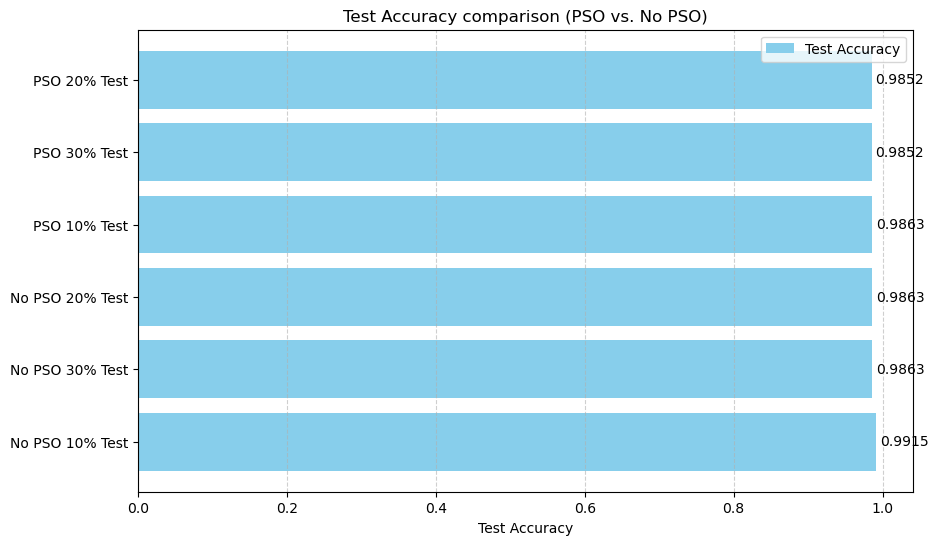

In [15]:
import matplotlib.pyplot as plt

# Collect test scores from each scenario
data = [pso_res["accuracy"], pso_res_30_split["accuracy"], pso_res_10_split["accuracy"], no_pso_res["accuracy"], no_pso_res_30_split["accuracy"], no_pso_res_10_split["accuracy"]]
split_ratios = ["PSO 20% Test", "PSO 30% Test", "PSO 10% Test", "No PSO 20% Test", "No PSO 30% Test", "No PSO 10% Test"]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(split_ratios, data, color='skyblue', label="Test Accuracy") # Plot each category separately
plt.xlabel('Test Accuracy')
plt.title('Test Accuracy comparison (PSO vs. No PSO)')
plt.gca().invert_yaxis()  # Invert y-axis to display largest split ratio at top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend() # Add a legend

# Add labels for each data point (adjusting for separate bars)
for i, score in enumerate(data):
    plt.text(score + 0.005, i, f"{score:.4f}", va='center')

plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# Reshape the data for compatibility with CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [17]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical

# Train the CNN model
# ...

# Encode target labels as one-hot vectors
num_classes = 3
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Build the CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test, y_test_encoded))

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.7641 - loss: 7.2589 - val_accuracy: 0.8845 - val_loss: 2.0363
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8884 - loss: 1.7486 - val_accuracy: 0.8948 - val_loss: 1.5926
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8933 - loss: 1.3689 - val_accuracy: 0.9192 - val_loss: 0.5998
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9161 - loss: 1.0035 - val_accuracy: 0.9266 - val_loss: 1.6281
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9450 - loss: 0.6320 - val_accuracy: 0.9676 - val_loss: 0.3745
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9540 - loss: 0.3600 - val_accuracy: 0.9556 - val_loss: 0.3614
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9575 - loss: 0.2974 - val_accuracy: 0.9619 - val_loss: 0.1832
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9619 - loss: 0.1572 - val_acc

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluate the model on the test data
from keras.utils import to_categorical

# Encode target labels as one-hot vectors
num_classes = 3
y_test_encoded = to_categorical(y_test, num_classes)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy:.4f}")

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9599 - loss: 0.4833
Test Accuracy: 0.9630


In [19]:
y_pred = model.predict(X_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_selected)
best_clusters = kmeans.predict(X_selected)
df['cluster1'] = best_clusters
high_caloric1 = df[best_clusters == 0]
mid_caloric1 = df[best_clusters == 1]
low_caloric1 = df[best_clusters == 2]

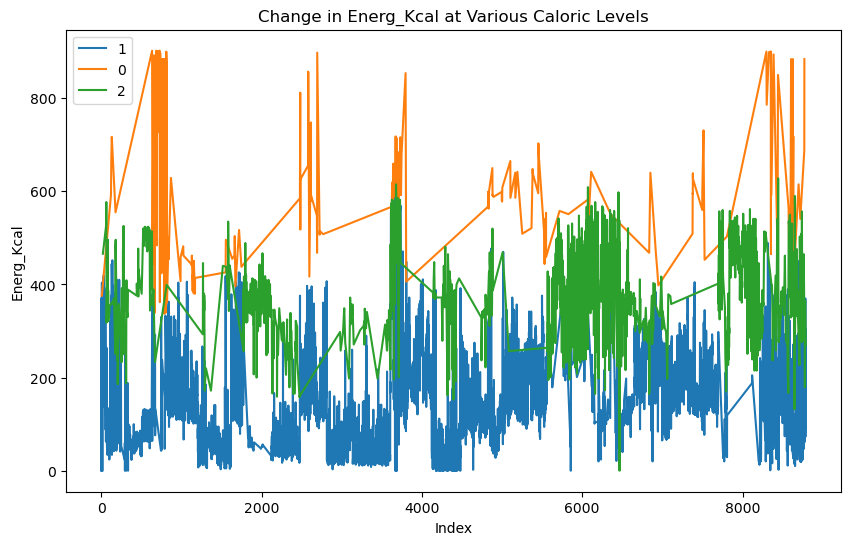

In [21]:
import matplotlib.pyplot as plt

# Select the columns of interest
columns_to_visualize = ['Energ_Kcal', 'cluster']

# Get the subset of the DataFrame for the selected columns
subset = df[columns_to_visualize]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the line plot
for caloric_level in subset['cluster'].unique():
    level_data = subset[subset['cluster'] == caloric_level]
    plt.plot(level_data.index, level_data['Energ_Kcal'], label=caloric_level)

plt.xlabel('Index')
plt.ylabel('Energ_Kcal')
plt.title('Change in Energ_Kcal at Various Caloric Levels')
plt.legend()

# Show the plot
plt.show()

Recommendation system

In [22]:
def recommend_diets(caloric_level,caloric_value , n=10):
    # Filter the dataset based on the caloric level
    filtered_data = df[df['cluster'] == caloric_level]

    # Sort the diets based on some criteria (e.g., nutrients)
    sorted_diets = filtered_data.sort_values(by=['Energ_Kcal'], ascending=False)

    # Return the top n recommended diets
    dff = sorted_diets
    recommended_diets = dff[(dff['Energ_Kcal'] >= caloric_value) & (df['Energ_Kcal'] <= caloric_value + 10)]

    return recommended_diets.head(n)

# Example usage:
top_10_diets_low_calorie = recommend_diets('low', 120,  n=10)
top_10_diets_mid_calorie = recommend_diets('mid', 300, n=10)
top_10_diets_high_calorie = recommend_diets('high', 800, n=10)

Code for pregnancy woman input

In [25]:
def nutrients(age, height, weight, preg_stage, active):
    if active == 'Sedentary':
        active = 1.2
    elif active == "Light Active":
        active = 1.375
    elif active == "Moderately Active":
        active = 1.55
    elif active == "Very Active":
        active = 1.75

    bmi = weight / (height * height)
    if bmi < 18.5:
        person = 'Underweight'
        if preg_stage == "FirstTrimester":
            goal = 2
        elif preg_stage == "SecondTrimester":
            goal = 10
        elif preg_stage == "ThirdTrimester":
            goal = 18
    elif bmi >= 18.5 and bmi <= 25:
        person = 'Health in Weight'
        if preg_stage == "FirstTrimester":
            goal = 2
        elif preg_stage == "SecondTrimester":
            goal = 10
        elif preg_stage == "ThirdTrimester":
            goal = 16
    elif bmi > 25:
        person = 'Overweight'
        if preg_stage == "FirstTrimester":
            goal = 2
        elif preg_stage == "SecondTrimester":
            goal = 7
        elif preg_stage == "ThirdTrimester":
            goal = 11

    # Mifflin-St Jeor BMR equation to get the BMR formula
    bmr = 10 * weight + 6.25 * height - 5 * age - 161

    # Needed calories = BMR multiplied by the activity level
    caloric_intake = bmr * float(active)

    return caloric_intake

def classify_caloric_intake(caloric_intake):
    if caloric_intake < 300:
        classification = "low"
    elif caloric_intake >= 300 and caloric_intake <= 350:
        classification = "mid"
    else:
        classification = "high"

    return classification

# Collect user input
age = int(input("Enter your age in years: "))
height = float(input("Enter your height in meters: "))
weight = float(input("Enter your weight in kilograms: "))
preg_stage = input("Enter your pregnancy stage (FirstTrimester, SecondTrimester, ThirdTrimester): ")
active = input("Enter your activity level (Sedentary, Light Active, Moderately Active, Very Active): ")

# Calculate caloric intake
caloric_intake = nutrients(age, height, weight, preg_stage, active)

# Classify caloric intake
caloric_classification = classify_caloric_intake(caloric_intake)

# Display the result
print("Your recommended caloric intake is:", caloric_intake, "calories per day.")
print("Caloric Intake Classification:", caloric_classification)
result = recommend_diets(caloric_classification, caloric_intake, n=5)
print(result[['Shrt_Desc', 'Energ_Kcal']].to_string(index=False))


Enter your age in years:  15
Enter your height in meters:  25
Enter your weight in kilograms:  30
Enter your pregnancy stage (FirstTrimester, SecondTrimester, ThirdTrimester):  FirstTrimester
Enter your activity level (Sedentary, Light Active, Moderately Active, Very Active):  Sedentary


Your recommended caloric intake is: 264.3 calories per day.
Caloric Intake Classification: low
Empty DataFrame
Columns: [Shrt_Desc, Energ_Kcal]
Index: []


In [27]:
15top_10_diets = df[df['Energ_Kcal'] < caloric_intake + 100].sort_values(by=['Energ_Kcal'], ascending=False).head(10)
print(round(caloric_intake, 2), "calories recommended per day")
top_10_diets[["Shrt_Desc", "Energ_Kcal"]]



SyntaxError: invalid decimal literal (877345124.py, line 1)